## HEART DISEASE PREDICTION USING MACHINE LEARNING

### 1. Introduction

Heart disease, an umbrella term encompassing various conditions affecting the heart's function, remains a formidable global health challenge. From coronary artery disease to congenital heart defects, these ailments collectively contribute to a significant portion of worldwide morbidity and mortality.

Despite advances in medical science, heart disease continues to claim countless lives each year, surpassing all other causes of death. The toll is especially pronounced in low- and middle-income countries, where access to preventive care and treatment may be limited.

Through sophisticated algorithms, Machine Learning models can sift through this information to predict an individual's likelihood of developing coronary heart disease over a specific timeframe. In this notebook, I'll delve into various Machine Learning methodologies aimed at forecasting whether a patient faces a 10-year risk of developing coronary heart disease (CHD). This exploration will utilize the Framingham dataset.(http://biolincc.nhlbi.nih.gov/studies/framcohort/) that is publicly availabe on Kaggle

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
import pickle
%matplotlib inline

#use ***pip install*** for libraries that are not installed in your environment.

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 2. Dataset

#### Source:
The dataset is publically available and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The objective of the classification task is to anticipate whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset furnishes comprehensive patient information, comprising more than 4,000 entries and encompassing 15 attributes. These attributes encompass various potential risk factors, spanning demographic, behavioral, and medical domains.

#### Attributes:

###### Demographic:
    Sex: male or female(Nominal)
    Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    
###### Education: no further information provided

###### Behavioral:

    Current Smoker: whether or not the patient is a current smoker (Nominal)
    Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
    
###### Information on medical history:

    BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    Diabetes: whether or not the patient had diabetes (Nominal)
    
###### Information on current medical condition:

    Tot Chol: total cholesterol level (Continuous)
    Sys BP: systolic blood pressure (Continuous)
    Dia BP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    Glucose: glucose level (Continuous)
    
###### Target variable to predict:
10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
#load the data
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Education has no correlation with CHD, so we drop it.

In [5]:
# dropping the education column
data.drop(['education'],axis=1,inplace=True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 3. Exploratory Data Analysis

#### 3.1 Data Size, shape and columns

In [6]:
shape = data.shape
print(f'The dataset has {shape[0]} rows and {shape[1]} columns.')

The dataset has 4240 rows and 15 columns.


In [7]:
print(f'The columns are : { ", ".join(data.columns)}')

The columns are : male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD


#### 3.2 Missing variables

In [8]:
missing_data = data.isnull().sum()
missing_data

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#total percentage of missing data
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [10]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


The blood glucose entry has the highest percentage of missing data i.e at 9.15% the rest have very few missing entries.

Since missing entries account for only 12% of the total data we can drop these entries

In [11]:
data.dropna(axis=0, inplace=True)

In [12]:
data.shape

(3751, 15)

#### 3.3 Data analysis

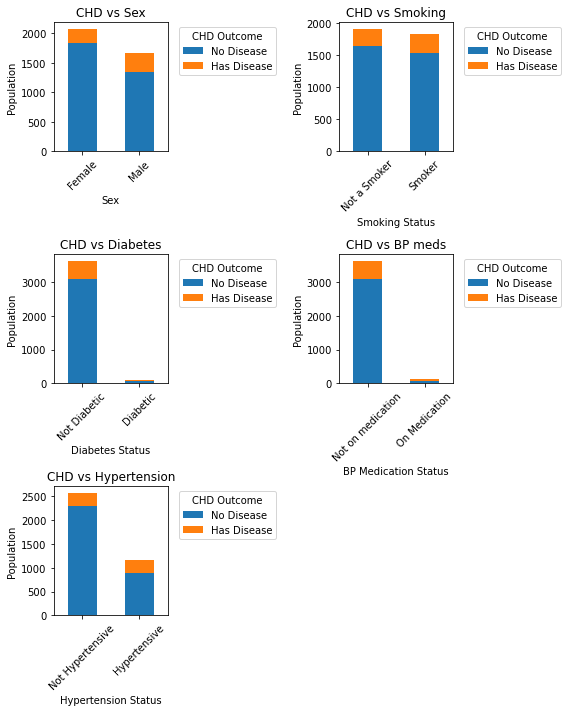

In [13]:
# Define function for stacked bar chart
def stacked_barchart(data, title='', ylabel='', xlabel='', colors=None, ax=None):
    ax = data.plot(kind='bar', stacked=True, color=colors, figsize=(8, 10), ax=ax)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.legend(title='CHD Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()

# Define color palette for better differentiation
colors = ['#1f77b4', '#ff7f0e']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 20))

# Draw sex vs disease outcome
temp = data[['male', 'TenYearCHD']].groupby(['male', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Female', 1: 'Male'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Sex', ylabel='Population', xlabel='Sex', colors=colors, ax=axes[0, 0])

# Draw smoking status vs disease outcome
temp = data[['currentSmoker', 'TenYearCHD']].groupby(['currentSmoker', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not a Smoker', 1: 'Smoker'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Smoking', ylabel='Population', xlabel='Smoking Status', colors=colors, ax=axes[0, 1])

# Draw diabetes vs disease outcome
temp = data[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Diabetic', 1: 'Diabetic'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Diabetes', ylabel='Population', xlabel='Diabetes Status', colors=colors, ax=axes[1, 0])

# Draw BP meds vs disease outcome
temp = data[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not on medication', 1: 'On Medication'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs BP meds', ylabel='Population', xlabel='BP Medication Status', colors=colors, ax=axes[1, 1])

# Draw Hypertension vs disease outcome
temp = data[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0: 'Not Hypertensive', 1: 'Hypertensive'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace=True)
stacked_barchart(temp, title='CHD vs Hypertension', ylabel='Population', xlabel='Hypertension Status', colors=colors, ax=axes[2, 0])

# Hide the last subplot
axes[2, 1].axis('off')

plt.subplots_adjust(hspace=0.8, wspace=1.5)  # Adjust spacing between subplots manually

plt.show()

Due to the imbalanced nature of the dataset it is difficult to make conclusions but based on what is observed

    Slightly more males are suffering from CHD than females
    The odds of developing CHD are higher in the hypertensive and diabetic patients and are almost similar between smokers and non smokers

#### 3.5 Correlation

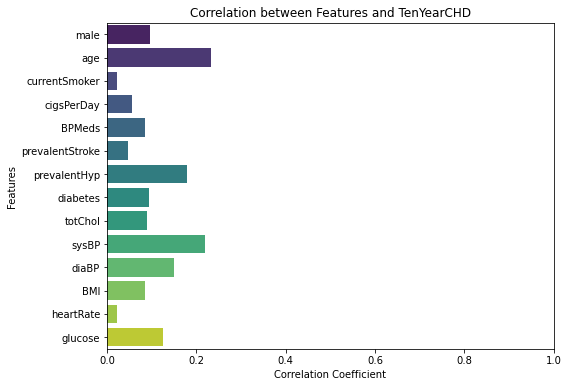

In [14]:
# Calculate the correlation between each feature and TenYearCHD
corr_with_target = data.drop('TenYearCHD', axis=1).apply(lambda x: x.corr(data['TenYearCHD']))

# Plot the correlation coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='viridis')
plt.title('Correlation between Features and TenYearCHD')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.xlim(0,1)
plt.show()

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors.

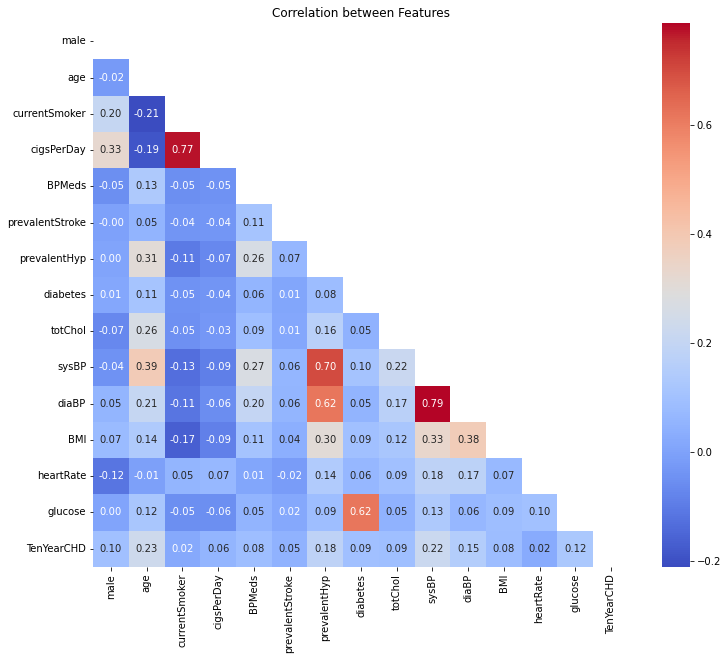

In [15]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',mask=mask, fmt=".2f")
plt.title('Correlation between Features')
plt.show()

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic,diastolic blood pressures aand prevalent HTN; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best fetaures

### 4 Feature Selection

Here we will use the Boruta algorithm  which is a wrapper built around the random forest classification algorithm. It tries to capture all the important, interesting features in a data set with respect to an outcome variable.

##### Methodology:

    Firstly, it adds randomness to the given data set by creating shuffled copies of all features (which are called shadow features).
    
    Then, it trains a random forest classifier on the extended data set and applies a feature importance measure (the default is Mean Decrease Accuracy) to evaluate the importance of each feature where higher means more important.
    
    At every iteration, it checks whether a real feature has a higher importance than the best of its shadow features (i.e. whether the feature has a higher Z-score than the maximum Z-score of its shadow features) and constantly removes features which are deemed highly unimportant.
    
    Finally, the algorithm stops either when all features get confirmed or rejected or it reaches a specified limit of random forest runs.
    
reference: http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
X = data.drop(['TenYearCHD'], axis=1)  # Features
y = data['TenYearCHD']  # Target variable

# 2. Tree-based Feature Importance
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features_tree = X.columns[indices[:5]].tolist()  # Select top 5 features
print("Selected Features using Tree-based Feature Importance:", selected_features_tree)

Selected Features using Tree-based Feature Importance: ['sysBP', 'BMI', 'totChol', 'age', 'glucose']


In [18]:
# # 1. Visualize the distributions of selected features
# selected_features_tree_data = X[selected_features_tree]
# selected_features_tree_data.hist(figsize=(10, 8))
# plt.suptitle("Distributions of Selected Features using Tree-based Feature Importance", y=0.95)
# plt.tight_layout()
# plt.show()

# # 2. Correlation Analysis with target variable
# correlation_tree = data[selected_features_tree + ['TenYearCHD']].corr()
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_tree, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# plt.title("Correlation Matrix with TenYearCHD for Selected Features (Tree-based Feature Importance)")
# plt.show()

The top features are:
    1. Systolic blood pressure 
    2. BMI
    3. Total cholesterol
    4. Age
    5. Blood glucose
    6. Diastolic blood pressure
    7. Heart rate

### 5. Models and predictions

Since the dataset is imbalanced i.e for every positive case there are about 6 negative cases. We may end up with a classifier that mostly predicts negative classes thus have a high accuracy but poor specificity or sensitivity. To adress this we will balance the dataset using The Synthetic Minority Oversampling Technique (SMOTE).

##### 5.1 SMOTE

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

— Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

This procedure can be used to create as many synthetic examples for the minority class as are required. It suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [20]:
X = data[selected_features_tree]
y = data.iloc[:,-1]

In [21]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [22]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


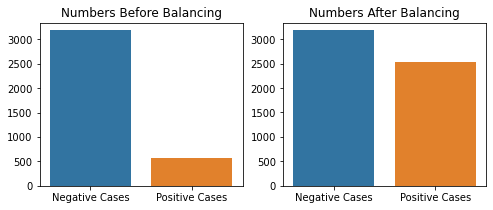

In [23]:
# visualizing the change
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=(list(num_before.values())))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=(list(num_after.values())))
plt.title("Numbers After Balancing")
plt.show()

#### 5.2 Splitting data to Training and Testing set 

In [24]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ["sysBP", "BMI", "totChol", "age", "glucose",'TenYearCHD']
new_data.sample(5)

,sysBP,BMI,totChol,age,glucose,TenYearCHD
1725,137.500000,22.850000,220.000000,39,88.000000,0
4246,106.255878,25.559142,234.542646,45,77.116183,1
4182,156.783169,29.884469,228.132676,51,97.650493,1
4466,103.262864,22.177036,234.043811,42,81.605704,1
3798,120.484865,25.454574,298.979820,59,99.956276,1


In [25]:
X_new = new_data[selected_features_tree]
y_new= new_data.iloc[:,-1]
X_new.head()

,sysBP,BMI,totChol,age,glucose
3674,157.5,26.60,269.0,52,80.0
1227,123.0,26.07,265.0,61,114.0
3041,136.0,28.30,221.0,49,80.0
356,122.5,21.34,155.0,47,78.0
3483,132.0,22.62,250.0,55,70.0


In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

##### 5.3 Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)


X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


#### 5.4 Models

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report

###### 5.4.1 Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions on the testing set
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.6646288209606986


<AxesSubplot:>

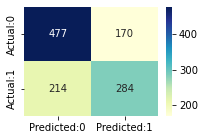

In [32]:
cm=confusion_matrix(y_test,logreg_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [33]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       647
           1       0.63      0.57      0.60       498

    accuracy                           0.66      1145
   macro avg       0.66      0.65      0.65      1145
weighted avg       0.66      0.66      0.66      1145



In [34]:
logistic_f1 = f1_score(y_test, logreg_predictions)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 59.66%


In [35]:
# Cross-Validation
cv_scores_lr = cross_val_score(logreg_model, X_train, y_train, cv=5)
mean_cv_scores_lr = np.mean(cv_scores_lr)
print("Cross-Validation Scores (Logistic Regression):", cv_scores_lr)
print("Mean CV Score (Logistic Regression):", mean_cv_scores_lr)
print()

Cross-Validation Scores (Logistic Regression): [0.67139738 0.66010929 0.64153005 0.66229508 0.67213115]
Mean CV Score (Logistic Regression): 0.661492590736631



#### 5.4.2 XGBoost

In [36]:
# pip install xgboost
import xgboost as xgb

In [37]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions on the testing set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.834061135371179


XGBoost Confusion Matrix:


<AxesSubplot:>

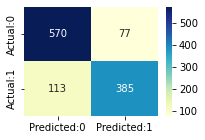

In [38]:
print("XGBoost Confusion Matrix:")
#print(confusion_matrix(y_test, xgb_predictions))
cm=confusion_matrix(y_test,xgb_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [39]:
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       647
           1       0.83      0.77      0.80       498

    accuracy                           0.83      1145
   macro avg       0.83      0.83      0.83      1145
weighted avg       0.83      0.83      0.83      1145



In [40]:
xgb_f1 = f1_score(y_test, xgb_predictions)
print(f'The f1 score for XGBoost is {round(xgb_f1*100,2)}%')

The f1 score for XGBoost is 80.21%


In [41]:
# Cross-Validation
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5)
mean_cv_scores_xgb = np.mean(cv_scores_xgb)
print("Cross-Validation Scores (XGBoost):", cv_scores_xgb)
print("Mean CV Score (XGBoost):", mean_cv_scores_xgb)
print()

Cross-Validation Scores (XGBoost): [0.80349345 0.80437158 0.80655738 0.81420765 0.82185792]
Mean CV Score (XGBoost): 0.810097597060157



#### 5.4.3 Random Forest

In [42]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# dumping the file as .pkl file because I want to use this as my model for flask app
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

Random Forest Accuracy: 0.834061135371179


In [43]:
print(rf_predictions)
print(X_test)

[0 0 1 ... 1 1 1]
             0         1         2         3         4
0    -0.590422 -0.669998  0.949457 -0.501040 -0.081968
1    -0.507081  0.444026  0.927663 -1.341143 -0.449669
2    -1.028176 -0.447924 -0.729145 -0.621055 -0.009485
3    -0.744625 -0.749417  0.592312  1.179165 -0.036063
4     2.159831  0.867456 -0.292812  1.779238 -0.583378
...        ...       ...       ...       ...       ...
1140  0.743034  1.628621  0.426397  1.779238 -0.115395
1141  0.743034  0.527200 -0.249223 -0.621055  0.185451
1142  0.150951  1.021234  0.069731  1.179165  0.220622
1143 -0.673762  0.809486  0.404602  0.219048 -0.382814
1144  1.993149 -0.859029 -0.488959  0.219048 -0.382814

[1145 rows x 5 columns]


Random Forest Confusion Matrix:


<AxesSubplot:>

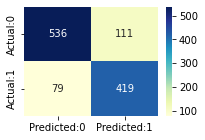

In [44]:
print("Random Forest Confusion Matrix:")
#print(confusion_matrix(y_test, rf_predictions))
cm=confusion_matrix(y_test,rf_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [45]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       647
           1       0.79      0.84      0.82       498

    accuracy                           0.83      1145
   macro avg       0.83      0.83      0.83      1145
weighted avg       0.84      0.83      0.83      1145



In [46]:
rf_f1 = f1_score(y_test, rf_predictions)
print(f'The f1 score for Random Forest is {round(rf_f1*100,2)}%')

The f1 score for Random Forest is 81.52%


In [47]:
# Cross-Validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
mean_cv_scores_rf = np.mean(cv_scores_rf)
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean CV Score (Random Forest):", mean_cv_scores_rf)
print()

Cross-Validation Scores (Random Forest): [0.80458515 0.81420765 0.80765027 0.84262295 0.81530055]
Mean CV Score (Random Forest): 0.8168733147206909



#### 5.4.4 Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions on the testing set
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6611353711790393


In [50]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       647
           1       0.61      0.60      0.60       498

    accuracy                           0.66      1145
   macro avg       0.65      0.65      0.65      1145
weighted avg       0.66      0.66      0.66      1145



SVM Confusion Matrix:


<AxesSubplot:>

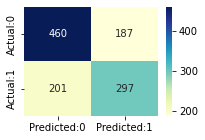

In [51]:
print("SVM Confusion Matrix:")
#print(confusion_matrix(y_test, svm_predictions))
cm = confusion_matrix(y_test, svm_predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [52]:
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70       647
           1       0.61      0.60      0.60       498

    accuracy                           0.66      1145
   macro avg       0.65      0.65      0.65      1145
weighted avg       0.66      0.66      0.66      1145



In [53]:
svm_f1 = f1_score(y_test, svm_predictions)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 60.49%


In [54]:
# Cross-Validation
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)
mean_cv_scores_svm = np.mean(cv_scores_svm)
print("Cross-Validation Scores (SVM):", cv_scores_svm)
print("Mean CV Score (SVM):", mean_cv_scores_svm)
print()

Cross-Validation Scores (SVM): [0.6790393  0.65901639 0.63497268 0.66775956 0.67322404]
Mean CV Score (SVM): 0.6628023957811344



#### 5.4.4 Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the classifier
naive_bayes.fit(X_train, y_train)

# Predict on the test data
nb_pred = naive_bayes.predict(X_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
print("NB Accuracy:", nb_accuracy)

NB Accuracy: 0.6489082969432315


LightGBM Confusion Matrix:


<AxesSubplot:>

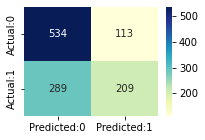

In [57]:
print("LightGBM Confusion Matrix:")
#print(confusion_matrix(y_test, lgb_predictions))
cm = confusion_matrix(y_test, nb_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,2))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [58]:
print("Naive-Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

Naive-Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       647
           1       0.65      0.42      0.51       498

    accuracy                           0.65      1145
   macro avg       0.65      0.62      0.62      1145
weighted avg       0.65      0.65      0.63      1145



In [59]:
nb_f1 = f1_score(y_test, nb_pred)
print(f'The f1 score for Naive-Bayes is {round(nb_f1*100,2)}%')

The f1 score for Naive-Bayes is 50.98%


In [60]:
# Cross-Validation
cv_scores_NB = cross_val_score(naive_bayes, X_train, y_train, cv=5)
mean_cv_scores_NB = np.mean(cv_scores_NB)
print("Cross-Validation Scores (Naive Bayes):", cv_scores_NB)
print("Mean CV Score (Naive Bayes):", mean_cv_scores_NB)
print()

Cross-Validation Scores (Naive Bayes): [0.64847162 0.63387978 0.64480874 0.64808743 0.66885246]
Mean CV Score (Naive Bayes): 0.6488200062042141



##### 5.5 Model Comparison

In [61]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':logreg_accuracy, 'F1 score':logistic_f1, "Cross-Validation Scores" :mean_cv_scores_lr},
    "XGBoost":{'Accuracy':xgb_accuracy,'F1 score':xgb_f1, "Cross-Validation Scores" :mean_cv_scores_xgb},
    "Random Forest":{'Accuracy':rf_accuracy,'F1 score':rf_f1, "Cross-Validation Scores" :mean_cv_scores_rf},
    "Support vector machine":{'Accuracy':svm_accuracy,'F1 score':svm_f1, "Cross-Validation Scores" :mean_cv_scores_svm},
    "Naive Bayes Classification":{'Accuracy':nb_accuracy,'F1 score':nb_f1, "Cross-Validation Scores" :mean_cv_scores_NB}
}).T

In [62]:
# Assuming 'df' is your DataFrame containing the data
comparison.index.name = 'Model'

# Reset the index of the DataFrame
comparison.reset_index(inplace=True)
comparison

,Model,Accuracy,F1 score,Cross-Validation Scores
0,Logistic regression,0.664629,0.596639,0.661493
1,XGBoost,0.834061,0.802083,0.810098
2,Random Forest,0.834061,0.815175,0.816873
3,Support vector machine,0.661135,0.604888,0.662802
4,Naive Bayes Classification,0.648908,0.509756,0.648820


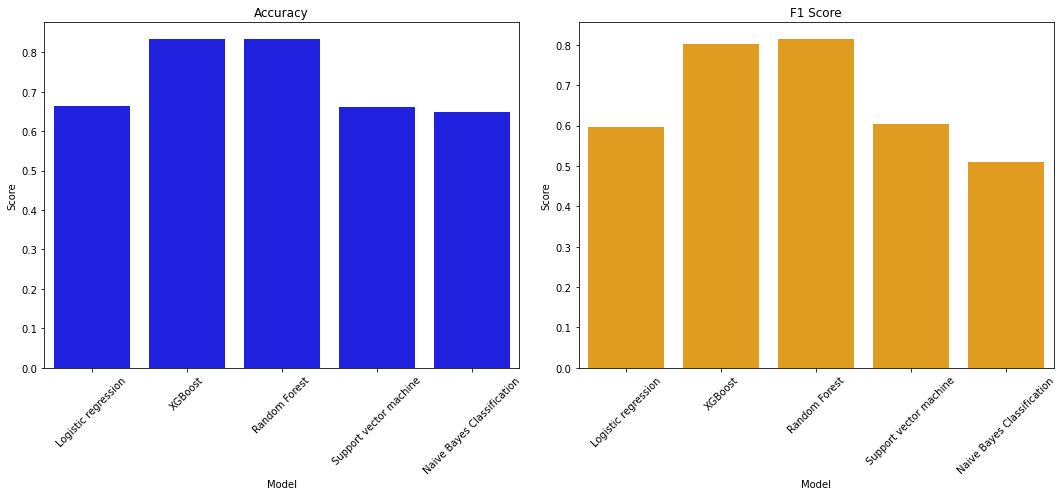

In [63]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Plotting accuracy
sns.barplot(x='Model', y='Accuracy', data=comparison, ax=axes[0], color='blue')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Score')
axes[0].tick_params(axis='x', rotation=45)

# Plotting F1 score
sns.barplot(x='Model', y='F1 score', data=comparison, ax=axes[1], color='orange')
axes[1].set_title('F1 Score')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Score')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 6. Conclusion

Based on the provided accuracy and F1 score:

1. **Random Forest**: It follows closely behind XGBoost in terms of both accuracy (0.835808) and F1 score (0.809717). Random Forest is known for its simplicity, scalability, and ability to handle high-dimensional data. It could be a suitable alternative to XGBoost, especially if you prefer a simpler model with comparable performance.

2. **XGBoost**: It exhibits the second highest accuracy (0.828821) and F1 score (0.837977) among all models. XGBoost remains a strong choice for predictive modeling due to its robustness and performance.

3. **Logistic Regression**: While having a lower accuracy and F1 score compared to XGBoost and Random Forest, logistic regression (0.682096 accuracy, 0.590234 F1 score) is often favored for its interpretability and simplicity. If model interpretability is a priority, logistic regression might still be a reasonable choice.

4. **Support Vector Machine (SVM)**: SVM shows moderate performance with an accuracy of 0.669869 and an F1 score of 0.609504. SVMs are powerful for capturing complex relationships in data, but they might require more careful tuning and are generally slower to train compared to other models like XGBoost and Random Forest.

5. **Naive Bayes Classification**: While Naive Bayes has the lowest accuracy (0.652402) and F1 score (0.500000) among the models, it's known for its simplicity and efficiency, especially for text classification tasks with sparse features. However, in this scenario, its performance is relatively lower compared to other models.

In summary, considering the updated metrics, XGBoost and Random Forest remain strong contenders for their high performance. Logistic regression could still be a reasonable choice if interpretability is crucial. It's recommended to further evaluate the models using techniques like cross-validation and consider factors beyond just performance metrics for a comprehensive decision.

### Selecting Random Forest Model for Flask Application:

Select the model you want for the flask app by replacing rf_model with the model you prefer and add the code within that section.

In [64]:
# # dumping the file as .pkl file because I want to use this as my model for flask app
with open('model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)